In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
def q(x):
    return -2 / ((x + 1) ** 2)

def f(x):
    return 9 / (2 * ((x + 1) ** (3 / 2)))

In [8]:
N = 50

In [9]:
h = 1 / N

In [10]:
X = np.linspace(0, 1, N + 1)

In [11]:
alpha_0 = 1
beta_0 = -2
gamma_0 = 0 
alpha_1 = 0
beta_1 = 1
gamma_1 = - np.sqrt(2) / 2

In [12]:
def точное_u(x):
    return -2 * np.sqrt(x + 1)

In [13]:
A = np.zeros((N + 1, N + 1))
b = np.zeros(N + 1)

for i in range(1, N):
    A[i][i - 1] = 1 / (h ** 2)
    A[i][i] = q(X[i]) - (2 / (h ** 2))
    A[i][i + 1] = 1 / (h ** 2)
    
    b[i] = f(X[i])

$$
\begin{cases}
{u(0)-2u'(0)=0} \\
{u'(1) = - \dfrac{\sqrt 2}{2}}
\end{cases}
$$

$$
\begin{cases}
 {y_0+\dfrac{y_2-4y_1+3y_0}{h}=0} \\
 {\dfrac{3y_{N}-4y_{N-1}+y_{N-2}}{h} = -\sqrt 2}
\end{cases}
$$

In [14]:
A[0][0] = 1 + 3 / h
A[0][1] = -4 / h
A[0][2] = 1 / h

b[0] = 0

A[N][N] = 3 / h
A[N][N - 1] = -4 / h
A[N][N - 2] = 1 / h

b[N] = -np.sqrt(2)

In [15]:
Y = np.linalg.solve(A, b)

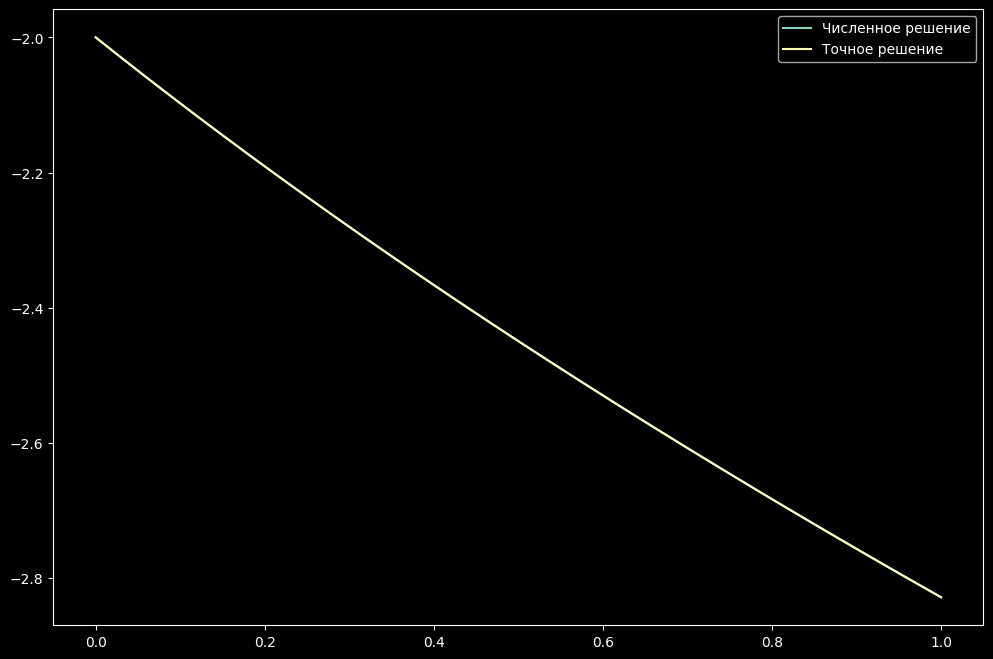

In [16]:
plt.figure(figsize=(12, 8))

plt.plot(X, Y, label='Численное решение')

tmp = np.linspace(0, 1, 1000)
plt.plot(tmp, точное_u(tmp), label='Точное решение')

plt.legend()

plt.show()

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(np.abs(точное_u(X) - Y))
df.describe()

,0
count,51.000000
mean,0.000057
std,0.000009
min,0.000044
25%,0.000049
50%,0.000056
75%,0.000064
max,0.000076
